In [ ]:
base='/content/sample_data/leaf'
import os
os.listdir
folder=os.listdir(base)
folder

['leaf', '.ipynb_checkpoints', 'Linear_leaf']

In [ ]:
import cv2
x1=[]
y1=[]
for i in folder:
  for j in os.listdir(base+'/'+i):
    a=j.split('.')
    if a[1]=='jpg':
      n=cv2.imread(base+'/'+i+'/'+j)
      r=cv2.resize(n,(224,224))
      x1.append(r)
      y1.append(i)

In [ ]:
x1

In [ ]:
for i in range (len(y1)):
  if y1[i]=='Linear_leaf':
    y1[i]=0
  else:
    y1[i]=1
y1

[1, 1, 1, 1]

In [ ]:
import numpy as np
x1arr=np.array(x1)
y1arr=np.array(y1)
x1arr=x1arr/255.0
x1arr.shape

(4, 224, 224, 3)

In [ ]:
from keras.applications.vgg16 import VGG16
vgg=VGG16(input_shape=(224,224,3),weights='imagenet',include_top=False)
vgg.summary()

In [ ]:
vgg.trainable=False
vgg.summary()

In [ ]:
from keras.models.sharpness_aware_minimization import Model
from keras.models import Sequential
from keras.layers import Flatten, Dense
model=Sequential()
model.add(vgg)
model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 1)                 25089     
                                                                 
Total params: 14,739,777
Trainable params: 25,089
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(x1arr,y1arr,epochs=10)

Epoch 1/10
1/1 [==============================] - 3s 3s/step - loss: 1.7410 - accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 2s 2s/step - loss: 0.0957 - accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - 2s 2s/step - loss: 0.0058 - accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 2s 2s/step - loss: 6.4782e-04 - accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 2s 2s/step - loss: 1.0768e-04 - accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 2s 2s/step - loss: 2.3752e-05 - accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 2s 2s/step - loss: 6.4787e-06 - accuracy: 1.0000
Epoch 8/10
1/1 [==============================] - 2s 2s/step - loss: 2.0885e-06 - accuracy: 1.0000
Epoch 9/10
1/1 [==============================] - 2s 2s/step - loss: 7.7120e-07 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 2s 2s/step - loss: 3.1887e-07 - accuracy: 1.0000


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 1)                 25089     
                                                                 
Total params: 14,739,777
Trainable params: 25,089
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
a=model.predict(x1arr)

1/1 [==============================] - 2s 2s/step


In [ ]:
b=[0]
import numpy as np
j=np.argmax(b)
b=[0,0,0,0,0,0,0,0,0,0]
b[j]=1
b

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

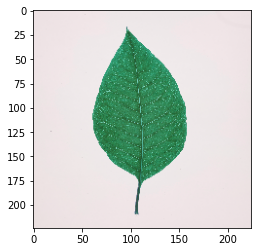

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x1arr[0])